In [1]:
import os
import numpy as np
import matplotlib

In [3]:
rootp = '../shared_exp/'
i0p = os.path.join(rootp,'interval0')
i1p = os.path.join(rootp,'interval1')
d005p = os.path.join(rootp,'dpm','eval_stage_effect_t005')
i0 = []
i1 = []
c0 = []
c1 = []
d005 = []
"""c2 = []
c2p = os.path.join(rootp,'interval_control_2')"""
c0p = os.path.join(rootp,'interval_control_0')
c1p = os.path.join(rootp,'interval_control_1')
for i in range(1,40,5):
    a = np.load(os.path.join(i0p,"report_{}.npz".format(i)))
    """b = np.load(os.path.join(i1p,"report_{}.npz".format(i)))"""
    c = np.load(os.path.join(c0p,"report_{}.npz".format(i)))
    d = np.load(os.path.join(c1p,"report_{}.npz".format(i)))
    d005.append(np.load(os.path.join(d005p,"report_{}.npz".format(i)))['fid'])
    i0.append(a['fid'])
    """i1.append(b['fid'])"""
    c0.append(c['fid'])
    c1.append(d['fid'])
    #c2.append(np.load(os.path.join(c2p,"report_{}.npz".format(i)))['fid'])
i0 = np.array(i0)
"""i1 = np.array(i1)"""
c0 = np.array(c0)
c1 = np.array(c1)
d005 = np.array(d005)
print(i0)
print(c0)
print(c1)
#print(c2)
print(d005)

[12.266156   5.333433   4.796983   4.6837535  4.6750164  4.797349
  4.8565917  5.012515 ]
[20.570427   7.899639   6.662842   6.2536654  5.839603   5.6333804
  5.4695153  5.5040607]
[13.108102   6.497095   5.7671566  5.44534    5.415515   5.452102
  5.4178042  5.425336 ]
[7.709337  5.8533235 5.7858124 5.469462  5.524149  5.3388267 5.4151106
 5.372903 ]


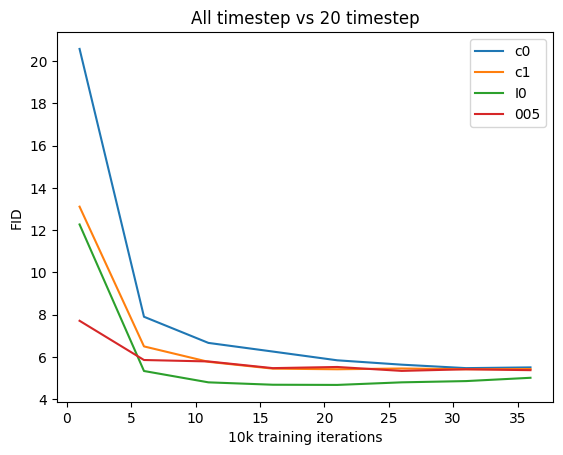

In [5]:

import matplotlib.pyplot as plt
y = list(range(1,40,5))
plt.plot(y,c0,label='c0')
plt.plot(y,c1,label='c1')
plt.plot(y,i0,label='I0')
plt.plot(y,d005,label='005')
#plt.plot(y,i1,label='I1')
plt.legend()
plt.xlabel("10k training iterations")
plt.ylabel("FID")
plt.title("All timestep vs 20 timestep")
plt.show()


In [ ]:
dpm_ori_path = "./experiments/dpm/eval/"
dpm_fewer_path = "./experiments/dpm_fewer/eval/"
dpm_ori = []
dpm_fewer = []
for i in range(5,105,5):
    a = np.load(dpm_ori_path+"report_{}.npz".format(i))
    dpm_ori.append(a['fid'])
    b = np.load(dpm_fewer_path+"report_{}.npz".format(i))
    dpm_fewer.append(b['fid'])
dpm_ori = np.array(dpm_ori)
dpm_fewer = np.array(dpm_fewer)
print(dpm_ori)
print(dpm_fewer)

[12.060902   7.906168   6.5395794  6.041954   5.691998   5.420396
  5.3846006  5.359099   5.4144063  5.3806787  5.298142   5.346576
  5.427935   5.3998866  5.4178224  5.4899807  5.4855156  5.432545
  5.4168158  5.516661 ]
[14.441078   9.79698    7.877878   7.1342683  6.6386886  6.541377
  6.3623405  6.366857   6.270207   6.3023496  6.2433558  6.272289
  6.242376   6.4643197  6.384663   6.3415174  6.334691   6.413345
  6.329011   6.4362717]


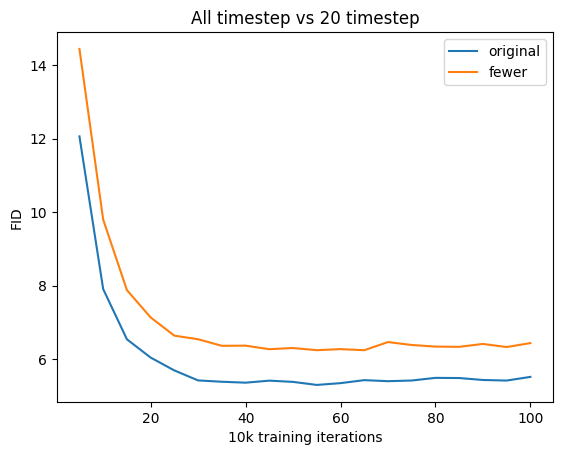

In [ ]:
import matplotlib.pyplot as plt
y = list(range(5,105,5))
plt.plot(y,dpm_ori,label='original')
plt.plot(y,dpm_fewer,label='fewer')
plt.legend()
plt.xlabel("10k training iterations")
plt.ylabel("FID")
plt.title("All timestep vs 20 timestep")
plt.show()